In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 100)

In [2]:
data_dir = '../input/data/train_dataset/'
train_set = 'train_data.csv'
test_set = 'test_data.csv'

In [3]:
train_data = pd.read_csv(data_dir+train_set)
test_data = pd.read_csv(data_dir+test_set)

In [4]:
train_data

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [5]:
test_data#[test_data.userID==3]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,3,A050023001,A050000023,1,2020-01-09 10:56:31,2626
1,3,A050023002,A050000023,1,2020-01-09 10:56:57,2626
2,3,A050023003,A050000023,0,2020-01-09 10:58:31,2625
3,3,A050023004,A050000023,0,2020-01-09 10:58:36,2625
4,3,A050023006,A050000023,0,2020-01-09 10:58:43,2623
...,...,...,...,...,...,...
260109,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832
260110,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832
260111,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244
260112,7439,A040130004,A040000130,1,2020-10-14 23:09:31,8244


In [6]:
test_data.groupby(test_data.userID).count()

,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
userID,,,,,
3,1036,1036,1036,1036,1036
4,671,671,671,671,671
13,1317,1317,1317,1317,1317
17,1260,1260,1260,1260,1260
26,387,387,387,387,387
...,...,...,...,...,...
7395,24,24,24,24,24
7404,15,15,15,15,15
7416,15,15,15,15,15


In [136]:
pd.read_csv(data_dir+'sample_submission.csv') # 0 ~ 743

,id,prediction
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
739,739,0.5
740,740,0.5
741,741,0.5
742,742,0.5


In [137]:
train_data.groupby(train_data['userID']).count() #0~7441

,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
userID,,,,,
0,745,745,745,745,745
1,933,933,933,933,933
2,276,276,276,276,276
5,833,833,833,833,833
6,921,921,921,921,921
...,...,...,...,...,...
7436,15,15,15,15,15
7437,16,16,16,16,16
7438,16,16,16,16,16


In [291]:
train_ids = set(train_data.userID)
test_ids = set(test_data.userID)

len(train_ids & test_ids) # train_data와 test_data의 userId 교집합크기

0

In [172]:
from collections import defaultdict as dfd

cnt_dict=dfd(int)
tid=train_data.testId.unique()
for i in tid:
    cls_name = i[:4]
    cnt_dict[cls_name]+=1
cnt_dict # test_id 대분류별 testID 갯수

defaultdict(int,
            {'A060': 186,
             'A080': 138,
             'A020': 194,
             'A040': 198,
             'A090': 74,
             'A030': 198,
             'A050': 193,
             'A010': 192,
             'A070': 164})

In [400]:
len(train_data.KnowledgeTag.unique())

912

In [370]:
# kt_in_tid = dfd(set)
a1=set(train_data['A010'<train_data.testId][train_data.testId<'A020'].KnowledgeTag.unique())
a2=set(train_data['A020'<train_data.testId][train_data.testId<'A030'].KnowledgeTag.unique())
a3=set(train_data['A030'<train_data.testId][train_data.testId<'A040'].KnowledgeTag.unique())
a4=set(train_data['A040'<train_data.testId][train_data.testId<'A050'].KnowledgeTag.unique())
a5=set(train_data['A050'<train_data.testId][train_data.testId<'A060'].KnowledgeTag.unique())
a6=set(train_data['A060'<train_data.testId][train_data.testId<'A070'].KnowledgeTag.unique())
a7=set(train_data['A070'<train_data.testId][train_data.testId<'A080'].KnowledgeTag.unique())
a8=set(train_data['A080'<train_data.testId][train_data.testId<'A090'].KnowledgeTag.unique())
a9=set(train_data['A090'<train_data.testId][train_data.testId<'A100'].KnowledgeTag.unique())
# for tid in train_data.testId.unique()[:200]:
#     kt_in_tid[tid].update(train_data[train_data.testId==tid].KnowledgeTag.unique())
# kt_in_tid

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/li

In [405]:
ppp=[a1, a2, a3, a4, a5, a6, a7, a8, a9]
for i, v in enumerate(ppp):
    print(i+1)
    print(sorted(v))

1
[5485, 5814, 5834, 5836, 5844, 5845, 5846, 6307, 6308, 6453, 6454, 6455, 6456, 6555, 6556, 6557, 6647, 6648, 6649, 6774, 6775, 6777, 6794, 6803, 6804, 6805, 6806, 6807, 7070, 7072, 7073, 7075, 7076, 7581, 7593, 7595, 7596, 7597, 7598, 7599, 7600, 7601, 7618, 7620, 7621, 7626, 7629, 7797, 7798, 7799, 7800, 7801, 7802, 7803, 7804, 7805, 7807, 7808, 7809, 7810, 7811, 7812, 7813, 7815]
2
[7693, 7694, 7696, 7747, 7751, 7822, 7912, 7913, 7914, 7915, 7916, 7918, 7919, 7920, 7921, 7922, 7924, 7925, 7926, 7927, 7928, 7929, 7930, 7932, 7933, 7934, 7935, 7936, 7938, 7941, 7943, 7944, 8002, 8003, 8004, 8005, 8006, 8014, 8015, 8016, 8017, 8018, 8019, 8020, 8021, 8022, 8023, 8027, 8091, 8092, 8093, 8094, 8095, 8096, 8097, 8122, 8123, 8124, 8125, 8126, 8127, 8129, 8130, 8131, 8132, 8133, 8134, 8135, 8136, 8137]
3
[307, 308, 309, 331, 332, 334, 339, 342, 346, 351, 355, 363, 365, 371, 373, 405, 407, 409, 411, 417, 419, 429, 431, 433, 436, 438, 439, 443, 447, 452, 458, 461, 464, 465, 471, 475, 481, 54

In [411]:
for i in range(8):
    for j in range(i+1, 9):
        if len(ppp[i] & ppp[j]):
            print(f'A0{i+1}0 & A0{j+1}0 : knowledgetag {ppp[i] & ppp[j]}')

A070 & A080 : knowledgetag {7863}


In [ ]:
# sorted(train_data[train_data.KnowledgeTag==7863].testId.unique())
# sorted(train_data[train_data.testId=='A070000140'].KnowledgeTag.unique())
# pd.set_option('display.max_rows', 1821)
# train_data[train_data.KnowledgeTag==7863]
train_data[train_data.userID==0]

In [ ]:
pd.set_option('display.max_rows', 1527)
train_data[train_data.KnowledgeTag==1255]#.testId.unique()

In [ ]:
# pd.set_option('display.max_rows', 100)
#train_data[train_data.userID==0]#[['testId', 'Timestamp', 'KnowledgeTag']][train_data.Timestamp<'2020-06']
# tmp=dfd(set)
# for i in train_data[train_data.userID==0].testId.unique():
#     tmp[i[:4]]+=1
# print(tmp)
# for i in train_data.testId.unique():
#     tmp[i[:4]].add(i[7:])
# len(tmp['A010']), len(tmp['A010'] & tmp['A090'])
# tmp['A090']

In [285]:
# tmp=dfd(set)
# for i in train_data.testId.unique()[:100]:
#     tags=set(train_data[train_data.testId==i].KnowledgeTag.unique())
#     tmp[i[:4]].update(tags)
kset=train_data.KnowledgeTag.unique()

In [327]:
pd.set_option('display.max_rows', 745)
# kset.sort()
# for kt in kset:
#     print(kt, train_data[train_data.KnowledgeTag==kt].testId.unique())
for m in range(1, 13):
    print(m, train_data[train_data.userID==6]['2020-'+str(m).rjust(2, '0')<=train_data.Timestamp][train_data.Timestamp<'2020-'+str(m+1).rjust(2, '0')].testId.unique())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


1 []
2 []


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


3 ['A030000016' 'A030000017' 'A030000012' 'A030000018' 'A030000014'
 'A030000007' 'A030000001' 'A030000008' 'A030000003' 'A030000009']
4 ['A030000025' 'A030000019' 'A030000026' 'A030000027' 'A030000033'
 'A030000030' 'A030000040' 'A030000044' 'A030000045' 'A030000038'
 'A030000034']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


5 ['A030000039' 'A030000036' 'A030000056' 'A030000046' 'A030000057'
 'A030000048' 'A030000058' 'A030000059' 'A030000052' 'A030000050'
 'A030000060' 'A030000054' 'A030000067' 'A030000068' 'A030000063']
6 ['A030000069' 'A040000059' 'A030000065' 'A040000002' 'A030000086'
 'A040000074' 'A040000084' 'A040000020' 'A040000097' 'A040000101'
 'A040000022' 'A040000091' 'A040000026' 'A040000024' 'A040000036']
7 ['A040000038' 'A040000040' 'A040000042' 'A040000047' 'A040000050'
 'A040000052' 'A040000054' 'A040000070' 'A040000064' 'A040000066'
 'A040000059' 'A040000074']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


8 ['A040000076' 'A040000082' 'A040000084' 'A040000095' 'A040000097'
 'A040000101' 'A040000089' 'A040000168' 'A040000091' 'A040000172'
 'A040000093' 'A040000174' 'A040000176' 'A040000178' 'A030000055'
 'A030000062' 'A040000180' 'A040000182' 'A030000072' 'A030000082'
 'A030000087' 'A030000084' 'A030000098' 'A030000099' 'A040000187'
 'A040000189' 'A030000090' 'A040000191']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


9 ['A030000092' 'A030000100' 'A030000101' 'A040000193' 'A030000103'
 'A030000093' 'A030000113' 'A030000104' 'A030000091' 'A040000171'
 'A030000094' 'A030000102' 'A030000096' 'A030000079' 'A030000105'
 'A040000169' 'A040000173' 'A040000175' 'A030000115' 'A030000073'
 'A030000106' 'A030000117' 'A040000177' 'A030000080' 'A030000075'
 'A030000081' 'A030000077' 'A030000024' 'A030000011' 'A030000013'
 'A030000015' 'A030000002' 'A030000004' 'A030000006' 'A030000022'
 'A030000020' 'A030000089' 'A030000085' 'A030000107' 'A030000083'
 'A030000071' 'A030000066' 'A040000110' 'A040000112' 'A030000064'
 'A030000053' 'A030000119' 'A040000114' 'A040000116' 'A030000109'
 'A030000051' 'A030000121' 'A030000108' 'A030000049' 'A040000118'
 'A030000047' 'A030000123' 'A040000120' 'A030000029' 'A030000125'
 'A030000110' 'A030000037' 'A030000035' 'A030000043' 'A030000041'
 'A030000031']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


10 ['A030000127' 'A030000135' 'A030000128' 'A030000137' 'A040000148'
 'A030000129' 'A030000139' 'A030000141' 'A040000166' 'A030000131'
 'A030000143' 'A040000139' 'A030000132' 'A040000168' 'A040000141'
 'A040000170' 'A030000130' 'A040000143' 'A030000145']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


11 []
12 []


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [426]:
len(train_data.KnowledgeTag.unique())

912

In [ ]:
sorted(train_data.KnowledgeTag.unique())
# pd.DataFrame(columns=[1, 2])

In [7]:
pd.set_option('display.max_rows', 100)
tmp=pd.DataFrame(columns=sorted(train_data.KnowledgeTag.unique()), index=sorted(train_data.KnowledgeTag.unique()))

In [542]:
def calc_inner(a, b):
    correct_a = set(train_data[train_data.KnowledgeTag==a][train_data.answerCode==1].userID)
    solve_b = set(train_data[train_data.KnowledgeTag==b].userID)
    correct_b = set(train_data[train_data.KnowledgeTag==b][train_data.answerCode==1].userID)
    
    return len(correct_a&correct_b) / len(correct_a&solve_b)

In [ ]:
import warnings
warnings.filterwarnings(action='ignore') 

for i, col in enumerate(sorted(train_data.KnowledgeTag.unique())):
    for row in sorted(train_data.KnowledgeTag.unique())[i:]:
        if row==col: tmp[col][row] = 1.
        else: 
            try: tmp[col][row] = calc_inner(col, row)
            except: tmp[col][row] = 0.
            tmp[row][col] = tmp[col][row]

In [545]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
tmp=tmp.apply(pd.to_numeric)
tmp.dtypes
tmp

,23,24,25,26,30,31,32,78,116,117,...,11214,11235,11236,11241,11246,11253,11265,11269,11270,11271
23,1,0.660066,0.880952,0.94702,0.589655,0.863799,0.95873,0.821429,0.8,0.869565,...,0.833333,0.928571,0.68,0.75,0.92,0.970588,0.785714,0.870968,0.428571,0.72
24,0.660066,1,0.941176,0.961326,0.617143,0.916201,0.957895,0.791667,0.857143,0.928571,...,0.782609,0.9,0.6,0.75,1.0,0.952381,0.833333,0.88,0.454545,0.684211
25,0.880952,0.941176,1,1.0,0.870968,0.837209,1.0,1.0,0.8,0.666667,...,0.888889,1.0,0.4,0.6,0.8,1.0,0.5,0.777778,0.666667,0.777778
26,0.94702,0.961326,1.0,1,0.591331,0.83959,0.959885,0.78125,0.782609,0.85,...,0.860465,0.941176,0.607143,0.652174,0.916667,0.97561,0.714286,0.861111,0.411765,0.548387
30,0.589655,0.617143,0.870968,0.591331,1,0.895028,0.970213,0.8125,0.785714,0.833333,...,0.8,0.9,0.631579,0.647059,0.933333,1.0,0.777778,0.894737,0.4,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11253,0.970588,0.952381,1.0,0.97561,1.0,0.971429,1.0,0.973684,1.0,1.0,...,0.981043,0.988372,0.980519,0.987097,0.984733,1,0.78022,0.885886,0.51462,0.505415
11265,0.785714,0.833333,0.5,0.714286,0.777778,0.833333,0.8125,0.6875,0.9,0.846154,...,0.75641,0.857143,0.82716,0.821429,0.856031,0.78022,1,0.918919,0.52381,0.59375
11269,0.870968,0.88,0.777778,0.861111,0.894737,0.931034,0.897436,0.885714,0.805556,0.804878,...,0.893023,0.888889,0.929825,0.948718,0.935065,0.885886,0.918919,1,0.512438,0.542169
11270,0.428571,0.454545,0.666667,0.411765,0.4,0.533333,0.45,0.642857,0.6875,0.631579,...,0.52381,0.580645,0.567568,0.569444,0.538462,0.51462,0.52381,0.512438,1,0.568


In [574]:
tmp.to_csv('rel_prob.csv', mode='w')
tmp = pd.read_csv('rel_prob.csv', index_col=0)

In [ ]:
pd.set_option('display.max_rows', 912)
pd.set_option('display.max_columns', 20)
tmp

In [26]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
plt.rcParams['figure.figsize'] = [25, 10]
ax=sns.heatmap(tmp, annot=True, fmt='.1f')
plt.show()

In [97]:
pd.set_option('display.max_rows', 100)
tmp=pd.DataFrame(columns=sorted(train_data.KnowledgeTag.unique()), index=sorted(train_data.KnowledgeTag.unique()))

In [98]:
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings(action='ignore')

for cat in range(1, 10):
    cond1 = f'A{str(cat).rjust(2, "0")}0' <= train_data.testId
    cond2 = train_data.testId < f'A{str(cat+1).rjust(2, "0")}0'
    board = train_data[cond1 & cond2]
    items = sorted(train_data[cond1 & cond2].KnowledgeTag.unique())
    for i, row in tqdm(enumerate(items)):
        for col in items[i:]:
            if row==col: tmp[col][row] = 1
            else:
                correct_a = set(board[board.KnowledgeTag==row][board.answerCode==1].userID)
                solve_b = set(board[board.KnowledgeTag==col].userID)
                correct_b = set(board[board.KnowledgeTag==col][board.answerCode==1].userID)
                try: tmp[col][row] = len(correct_a&correct_b) / len(correct_a&solve_b)
                except: tmp[col][row] = 0
                tmp[row][col] = tmp[col][row]
tmp=tmp.apply(pd.to_numeric)

In [100]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
tmp

,23,24,25,26,30,31,32,78,116,117,...,11214,11235,11236,11241,11246,11253,11265,11269,11270,11271
23,1.000000,0.660066,0.880952,0.947020,0.589655,0.863799,0.958730,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,0.660066,1.000000,0.941176,0.961326,0.617143,0.916201,0.957895,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,0.880952,0.941176,1.000000,1.000000,0.870968,0.837209,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.947020,0.961326,1.000000,1.000000,0.591331,0.839590,0.959885,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,0.589655,0.617143,0.870968,0.591331,1.000000,0.895028,0.970213,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.981043,0.988372,0.980519,0.987097,0.984733,1.000000,0.780220,0.885886,0.514620,0.505415
11265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.756410,0.857143,0.827160,0.821429,0.856031,0.780220,1.000000,0.918919,0.523810,0.593750
11269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.893023,0.888889,0.929825,0.948718,0.935065,0.885886,0.918919,1.000000,0.512438,0.542169
11270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.523810,0.580645,0.567568,0.569444,0.538462,0.514620,0.523810,0.512438,1.000000,0.568000


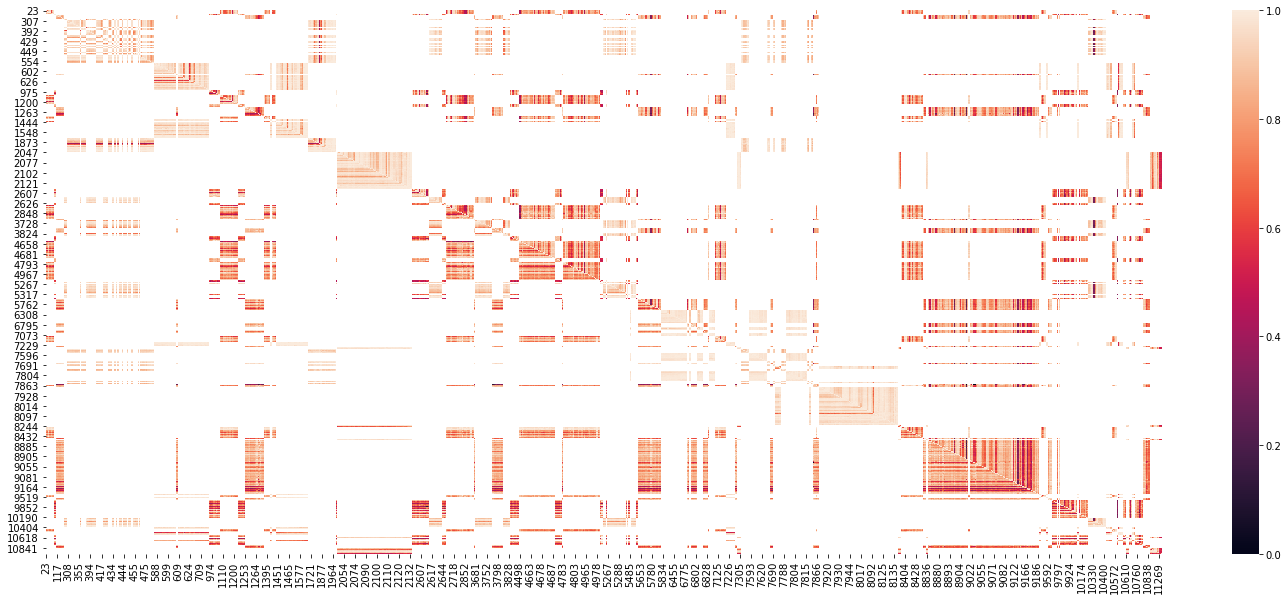

In [101]:
plt.rcParams['figure.figsize'] = [25, 10]
ax=sns.heatmap(tmp)#, annot=True, fmt='.1f')
plt.show()

In [102]:
tmp.to_csv('rel_prob_2.csv', mode='w')
tmp = pd.read_csv('rel_prob_2.csv', index_col=0)

<AxesSubplot:>

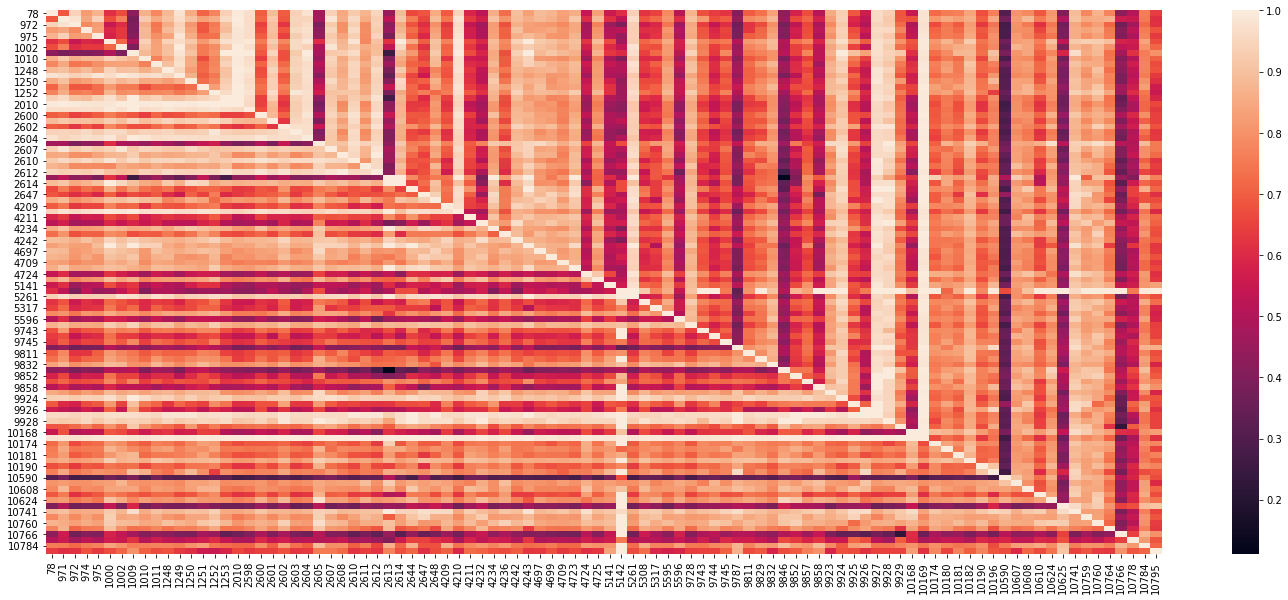

In [141]:
cat=9
cond1 = f'A{str(cat).rjust(2, "0")}0' <= train_data.testId
cond2 = train_data.testId < f'A{str(cat+1).rjust(2, "0")}0'
board = train_data[cond1 & cond2]
items=sorted(board.KnowledgeTag.unique())
sns.heatmap(tmp.loc[items, list(map(str, items))])

In [142]:
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings(action='ignore')

tmp=pd.DataFrame(columns=sorted(train_data.KnowledgeTag.unique()), index=sorted(train_data.KnowledgeTag.unique()))

for cat in range(1, 10):
    cond1 = f'A{str(cat).rjust(2, "0")}0' <= train_data.testId
    cond2 = train_data.testId < f'A{str(cat+1).rjust(2, "0")}0'
    board = train_data[cond1 & cond2]
    items = sorted(train_data[cond1 & cond2].KnowledgeTag.unique())
    for i, row in tqdm(enumerate(items)):
        for col in items[i:]:
            if row==col: tmp[col][row] = 1
            else:
                a = set(board[board.KnowledgeTag==row].userID)
                b = set(board[board.KnowledgeTag==col].userID)
                correct_all = set(board[board.KnowledgeTag==row][board.answerCode==1].userID) & set(board[board.KnowledgeTag==col][board.answerCode==1].userID)
                wrong_all = set(board[board.KnowledgeTag==row][board.answerCode==0].userID) & set(board[board.KnowledgeTag==col][board.answerCode==0].userID)
                try: tmp[col][row] = len(correct_all&wrong_all) / len(a&b)
                except: tmp[col][row] = 0
                tmp[row][col] = tmp[col][row]
tmp=tmp.apply(pd.to_numeric)

In [143]:
tmp

,23,24,25,26,30,31,32,78,116,117,...,11214,11235,11236,11241,11246,11253,11265,11269,11270,11271
23,1.000000,0.011527,0.010989,0.505952,0.067901,0.382637,0.536723,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,0.011527,1.000000,0.000000,0.006993,0.003610,0.010563,0.013029,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,0.010989,0.000000,1.000000,0.013699,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.505952,0.006993,0.013699,1.000000,0.088319,0.391304,0.607895,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,0.067901,0.003610,0.000000,0.088319,1.000000,0.052795,0.082742,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.581197,0.268041,0.018018,0.033333,0.224638,1.000000,0.075269,0.491228,0.000000,0.088028
11265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.060976,0.148936,0.000000,0.015504,0.050542,0.075269,1.000000,0.096154,0.000000,0.021739
11269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.543825,0.349206,0.037037,0.035211,0.195122,0.491228,0.096154,1.000000,0.004484,0.105691
11270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004484,1.000000,0.003846


<AxesSubplot:>

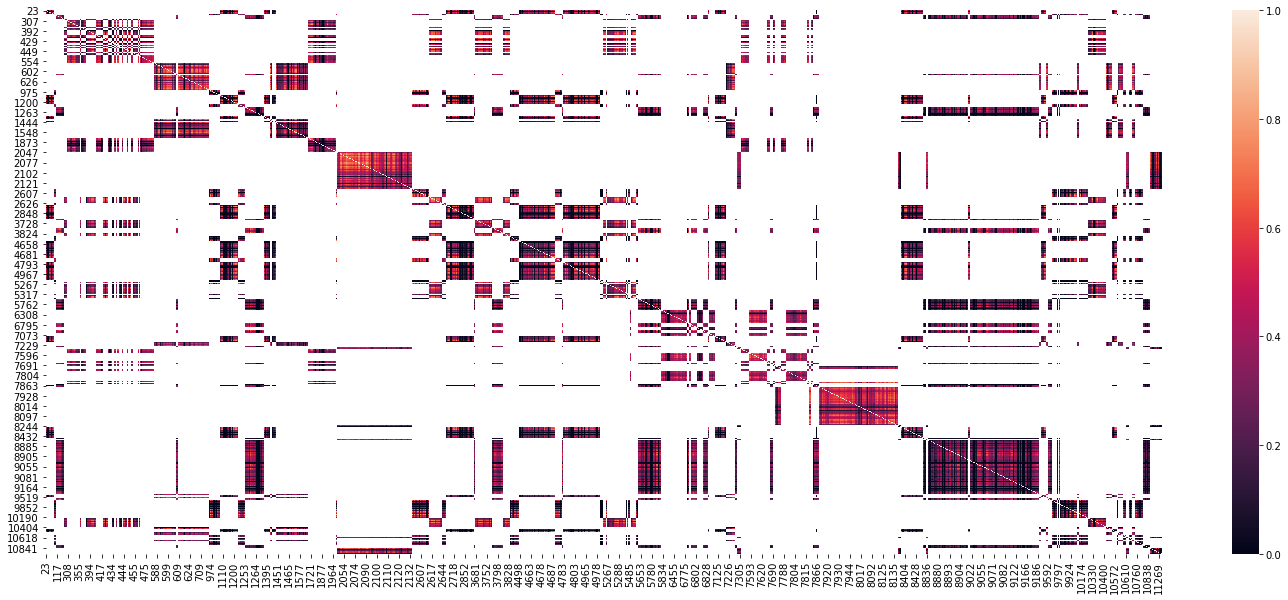

In [144]:
sns.heatmap(tmp)

In [ ]:
cat=0

<AxesSubplot:>

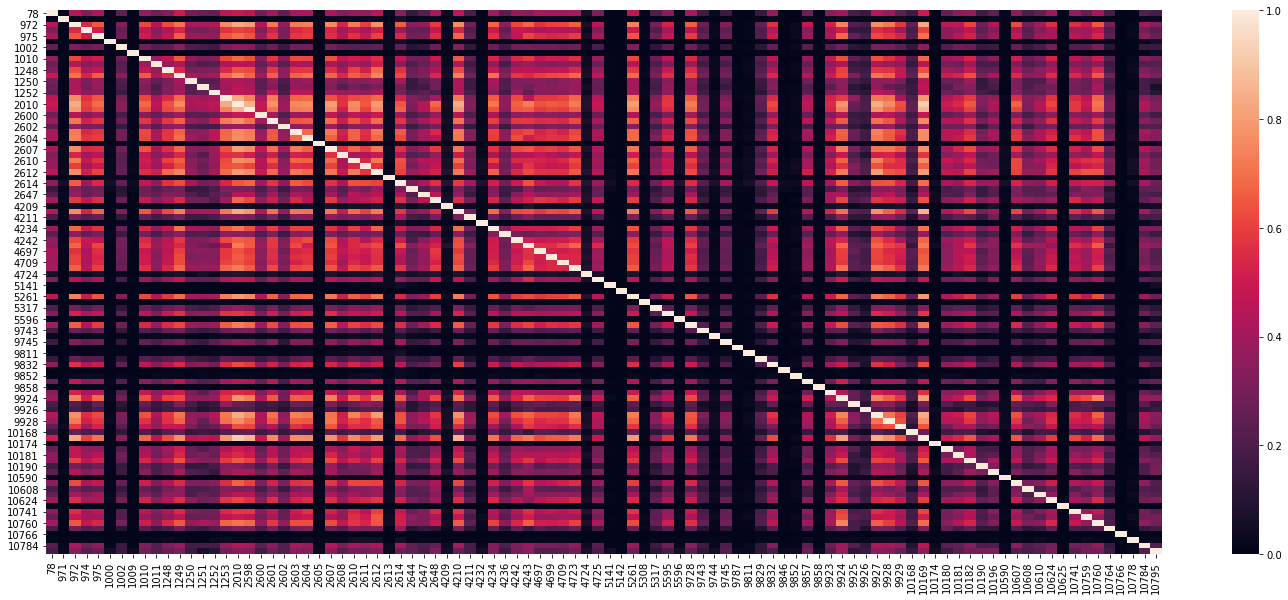

In [161]:
cat+=1
cond1 = f'A{str(cat).rjust(2, "0")}0' <= train_data.testId
cond2 = train_data.testId < f'A{str(cat+1).rjust(2, "0")}0'
board = train_data[cond1 & cond2]
items=sorted(board.KnowledgeTag.unique())
sns.heatmap(tmp.loc[items, items])

In [163]:
tmp.to_csv('rel_prob_3.csv', mode='w')
tmp = pd.read_csv('rel_prob_3.csv', index_col=0)

In [164]:
tmp

,23,24,25,26,30,31,32,78,116,117,...,11214,11235,11236,11241,11246,11253,11265,11269,11270,11271
23,1.000000,0.011527,0.010989,0.505952,0.067901,0.382637,0.536723,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,0.011527,1.000000,0.000000,0.006993,0.003610,0.010563,0.013029,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,0.010989,0.000000,1.000000,0.013699,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.505952,0.006993,0.013699,1.000000,0.088319,0.391304,0.607895,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,0.067901,0.003610,0.000000,0.088319,1.000000,0.052795,0.082742,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.581197,0.268041,0.018018,0.033333,0.224638,1.000000,0.075269,0.491228,0.000000,0.088028
11265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.060976,0.148936,0.000000,0.015504,0.050542,0.075269,1.000000,0.096154,0.000000,0.021739
11269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.543825,0.349206,0.037037,0.035211,0.195122,0.491228,0.096154,1.000000,0.004484,0.105691
11270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004484,1.000000,0.003846


In [298]:
monthly = pd.DataFrame(columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', 'sum'],
                       index=['2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'], 
                       data=[[0 for i in range(10)] for j in range(13)], 
                       dtype=int)
monthly

,1,2,3,4,5,6,7,8,9,sum
2019-12,0,0,0,0,0,0,0,0,0,0
2020-01,0,0,0,0,0,0,0,0,0,0
2020-02,0,0,0,0,0,0,0,0,0,0
2020-03,0,0,0,0,0,0,0,0,0,0
2020-04,0,0,0,0,0,0,0,0,0,0
2020-05,0,0,0,0,0,0,0,0,0,0
2020-06,0,0,0,0,0,0,0,0,0,0
2020-07,0,0,0,0,0,0,0,0,0,0
2020-08,0,0,0,0,0,0,0,0,0,0
2020-09,0,0,0,0,0,0,0,0,0,0


In [300]:
for c in tqdm(range(1, 10)):
    cd1 = '2019-12' <= train_data.Timestamp
    cd2 = train_data.Timestamp < '2020-01'
    cd3 = f'A0{str(c)}' < train_data.testId
    cd4 = train_data.testId < f'A{str(c+1).rjust(2, "0")}'
    monthly[str(c)]['2019-12'] += len(train_data[cd1 & cd2 & cd3 & cd4])
monthly.iloc[0]['sum'] = sum(monthly.iloc[0])

for m in tqdm(range(1, 13)):
    for c in range(1, 10):
        cd1 = f'2020-{str(m).rjust(2, "0")}' <= train_data.Timestamp
        cd2 = train_data.Timestamp < f'2020-{str(m+1).rjust(2, "0")}'
        cd3 = f'A0{str(c)}' < train_data.testId
        cd4 = train_data.testId < f'A{str(c+1).rjust(2, "0")}'
        monthly[str(c)][f'2020-{str(m).rjust(2, "0")}'] += len(train_data[cd1 & cd2 & cd3 & cd4])
    monthly.iloc[m]['sum'] = sum(monthly.iloc[m])
monthly

,1,2,3,4,5,6,7,8,9,sum
2019-12,0,8,0,0,0,11,0,0,0,19
2020-01,3403,3971,5477,6138,7651,5088,2737,2898,24,37387
2020-02,6262,8450,10857,12031,14102,9268,8357,6085,4066,79478
2020-03,18318,18962,21386,19437,21002,20017,21416,18277,15667,174482
2020-04,21566,18753,19484,17905,19178,19858,20708,22298,17203,176953
2020-05,24473,19660,20607,18558,18652,20089,21908,23926,15943,183816
2020-06,34300,28703,26331,24570,25571,25558,25264,23271,13913,227481
2020-07,39310,34463,35221,35960,36849,33664,30727,17177,7226,270597
2020-08,33283,38079,45504,45134,46607,44685,30185,21086,11552,316115
2020-09,46325,47407,43869,41724,43820,44529,29553,27975,14063,339265


<AxesSubplot:>

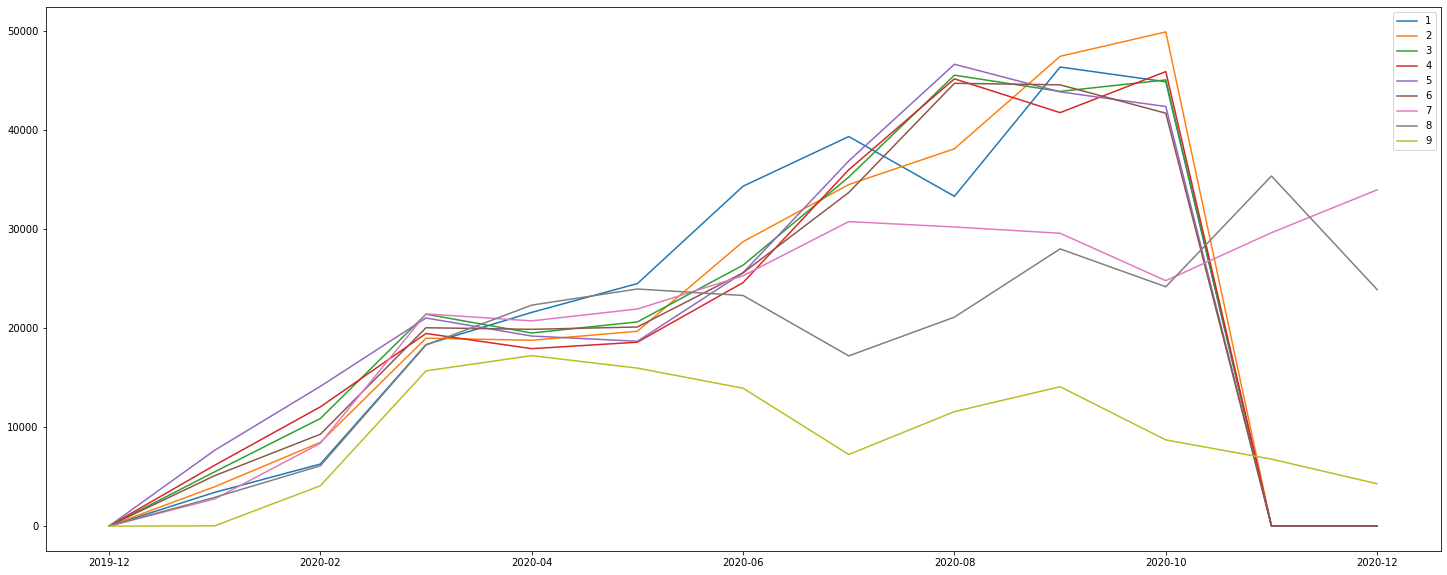

In [308]:
monthly.drop(columns=['sum']).plot()

In [352]:
points=pd.DataFrame(columns=['tag', 'class'])
points

,tag,class


In [344]:
# train_data
cd1 = 'A010' < train_data.testId
cd2 = train_data.testId < 'A020'
points['tag']=sorted(train_data[cd1 & cd2].KnowledgeTag.unique())
points['class']=['1' for i in range(len(train_data[cd1 & cd2].KnowledgeTag.unique()))]

In [353]:
for i in range(1, 10):
    aa = pd.DataFrame(columns=['tag', 'class'])
    cd1 = f'A0{str(i)}' < train_data.testId
    cd2 = train_data.testId < f'A{str(i+1).rjust(2, "0")}'
    aa['tag'] = sorted(train_data[cd1 & cd2].KnowledgeTag.unique())
    aa['class'] = [str(i) for _ in range(len(train_data[cd1 & cd2].KnowledgeTag.unique()))]
    points=points.append(aa, ignore_index=True)

<AxesSubplot:xlabel='tag', ylabel='class'>

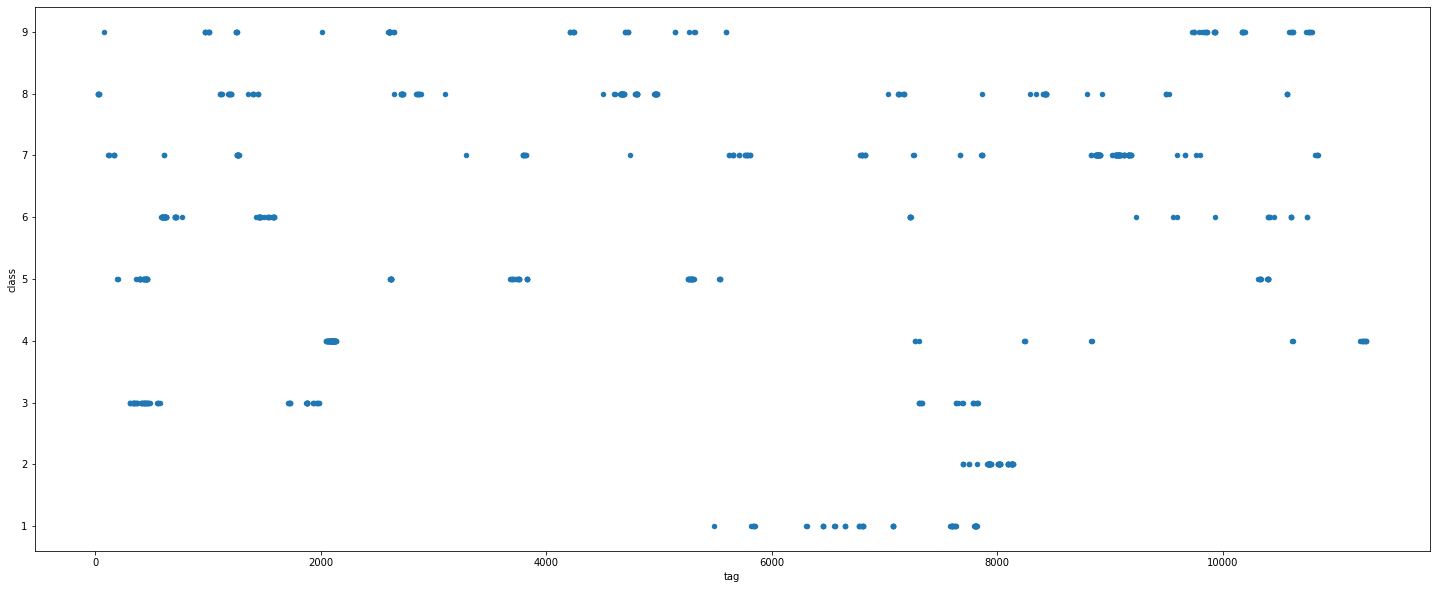

In [359]:
points.plot.scatter(x='tag', y='class')
# points

In [382]:
train_data.userID.unique()

array([   0,    1,    2, ..., 7438, 7440, 7441])

In [387]:
pd.set_option('display.max_rows', 933)
train_data[train_data.userID==2]#.sort_values(by=['Timestamp'], axis=0)

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
1678,2,A030050001,A030000050,1,2020-01-10 11:02:53,407
1679,2,A030050002,A030000050,1,2020-01-10 11:03:45,407
1680,2,A030050003,A030000050,1,2020-01-10 11:04:20,407
1681,2,A030050004,A030000050,1,2020-01-10 11:04:57,407
1682,2,A030050005,A030000050,1,2020-01-10 11:06:27,407
1683,2,A030001001,A030000001,1,2020-03-07 09:34:08,307
1684,2,A030001002,A030000001,1,2020-03-07 09:36:31,307
1685,2,A030001003,A030000001,1,2020-03-07 09:38:13,307
1686,2,A030001004,A030000001,1,2020-03-07 09:39:23,307
1687,2,A030001005,A030000001,1,2020-03-07 09:40:32,307
